In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
MyList = []

In [3]:
# Because the file size is large(3gb) we divide the reading process into chunks. 
#We also created a list (MyList) to put all the chunks we read into.
#we specify the memory to false because its default is true. This will help to prevent mixed data type error that could occur.

In [4]:
ChunkSize = 20000

In [5]:
for chunk in pd.read_csv('Train2.csv', chunksize=ChunkSize, low_memory=False):
    MyList.append(chunk)

In [6]:
#join all chunks together to form a data frame
df = pd.concat(MyList, axis=0)

In [7]:
#set to display all the columns
pd.set_option('display.max_columns', None)

In [9]:
df.shape

(13393927, 49)

In [12]:
df.head()

,Unnamed: 0,Date,Customer_code,Employee_index,Country,Gender,Age,Customer_join_date,Customer_index,Customer_seniority,Primary_customer,Customer_leave_date,Customer_type,Customer_relation,Residence_index,Foreigner_index,Spouse_index,Channel,Deceased_index,Primary_address,Customer_address,Province_name,Activity_index,Gross_income,Segmentation,Saving_account,Guarantees,Current_accounts,Derivative_account,Payroll_account,Junior_account,More_private_account,Private_account,Private_plus_account,Short_term_deposits,Medium_term_deposits,Long_term_deposits,E_account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_card,Securities,Home_account,Payroll,Pensions_2,Direct_debit
0,0,2015-01-28,1375586,Not-employee,ES,Male,35,2015-01-12,Old-customer,6,1.0,0,Primary-customer,Active,Yes,No,Not Applicable,KHL,No,1.0,29.0,MALAGA,Active,87218.10,Individual,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Inactive,Yes,Yes,Not Applicable,KHE,No,1.0,13.0,CIUDAD REAL,Inactive,35548.74,College-graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Inactive,Yes,No,Not Applicable,KHE,No,1.0,13.0,CIUDAD REAL,Inactive,122179.11,College-graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,Not-employee,ES,Male,22,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Inactive,Yes,No,Not Applicable,KHD,No,1.0,50.0,ZARAGOZA,Inactive,119775.54,College-graduate,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,Not-employee,ES,Female,23,2012-08-10,Old-customer,35,1.0,0,Primary-customer,Active,Yes,No,Not Applicable,KHE,No,1.0,50.0,ZARAGOZA,Active,451931.22,College-graduate,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
# deleting Mylist and chunk to reduce memory
del MyList
del chunk

In [8]:
#descrption on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393927 entries, 0 to 13393926
Data columns (total 49 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   Date                  object 
 2   Customer_code         int64  
 3   Employee_index        object 
 4   Country               object 
 5   Gender                object 
 6   Age                   int64  
 7   Customer_join_date    object 
 8   Customer_index        object 
 9   Customer_seniority    int64  
 10  Primary_customer      float64
 11  Customer_leave_date   object 
 12  Customer_type         object 
 13  Customer_relation     object 
 14  Residence_index       object 
 15  Foreigner_index       object 
 16  Spouse_index          object 
 17  Channel               object 
 18  Deceased_index        object 
 19  Primary_address       float64
 20  Customer_address      float64
 21  Province_name         object 
 22  Activity_index        object 
 23  Gross

In [9]:
df.isnull().sum()

Unnamed: 0              0
Date                    0
Customer_code           0
Employee_index          0
Country                 0
Gender                  0
Age                     0
Customer_join_date      0
Customer_index          0
Customer_seniority      0
Primary_customer        0
Customer_leave_date     0
Customer_type           0
Customer_relation       0
Residence_index         0
Foreigner_index         0
Spouse_index            0
Channel                 0
Deceased_index          0
Primary_address         0
Customer_address        0
Province_name           0
Activity_index          0
Gross_income            0
Segmentation            0
Saving_account          0
Guarantees              0
Current_accounts        0
Derivative_account      0
Payroll_account         0
Junior_account          0
More_private_account    0
Private_account         0
Private_plus_account    0
Short_term_deposits     0
Medium_term_deposits    0
Long_term_deposits      0
E_account               0
Funds       

# Hypotheses: Are there any products that are commonly purchased together?

In [34]:
# drop the 'Date' column from the dataframe before creating the correlation matrix
df = df.drop('Date', axis=1)

In [35]:
# Select only the product columns for correlation analysis
product_cols = df.columns[1:]

In [36]:
#include only numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()

In [38]:
# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

In [30]:
# Print the correlation matrix
print(corr_matrix)

                      Unnamed: 0  Customer_code       Age  Customer_seniority  \
Unnamed: 0              1.000000       0.093515 -0.020222           -0.027891   
Customer_code           0.093515       1.000000 -0.609102           -0.959822   
Age                    -0.020222      -0.609102  1.000000            0.598397   
Customer_seniority     -0.027891      -0.959822  0.598397            1.000000   
Primary_customer        0.001800       0.016449  0.000708           -0.017704   
Primary_address              NaN            NaN       NaN                 NaN   
Customer_address       -0.003908      -0.041211  0.051633            0.042234   
Gross_income            0.035061       0.011425  0.015549            0.001963   
Saving_account         -0.002095      -0.013165  0.004957            0.013678   
Guarantees             -0.001189      -0.005506  0.000856            0.005820   
Current_accounts       -0.124892       0.165686 -0.173354           -0.174802   
Derivative_account     -0.00

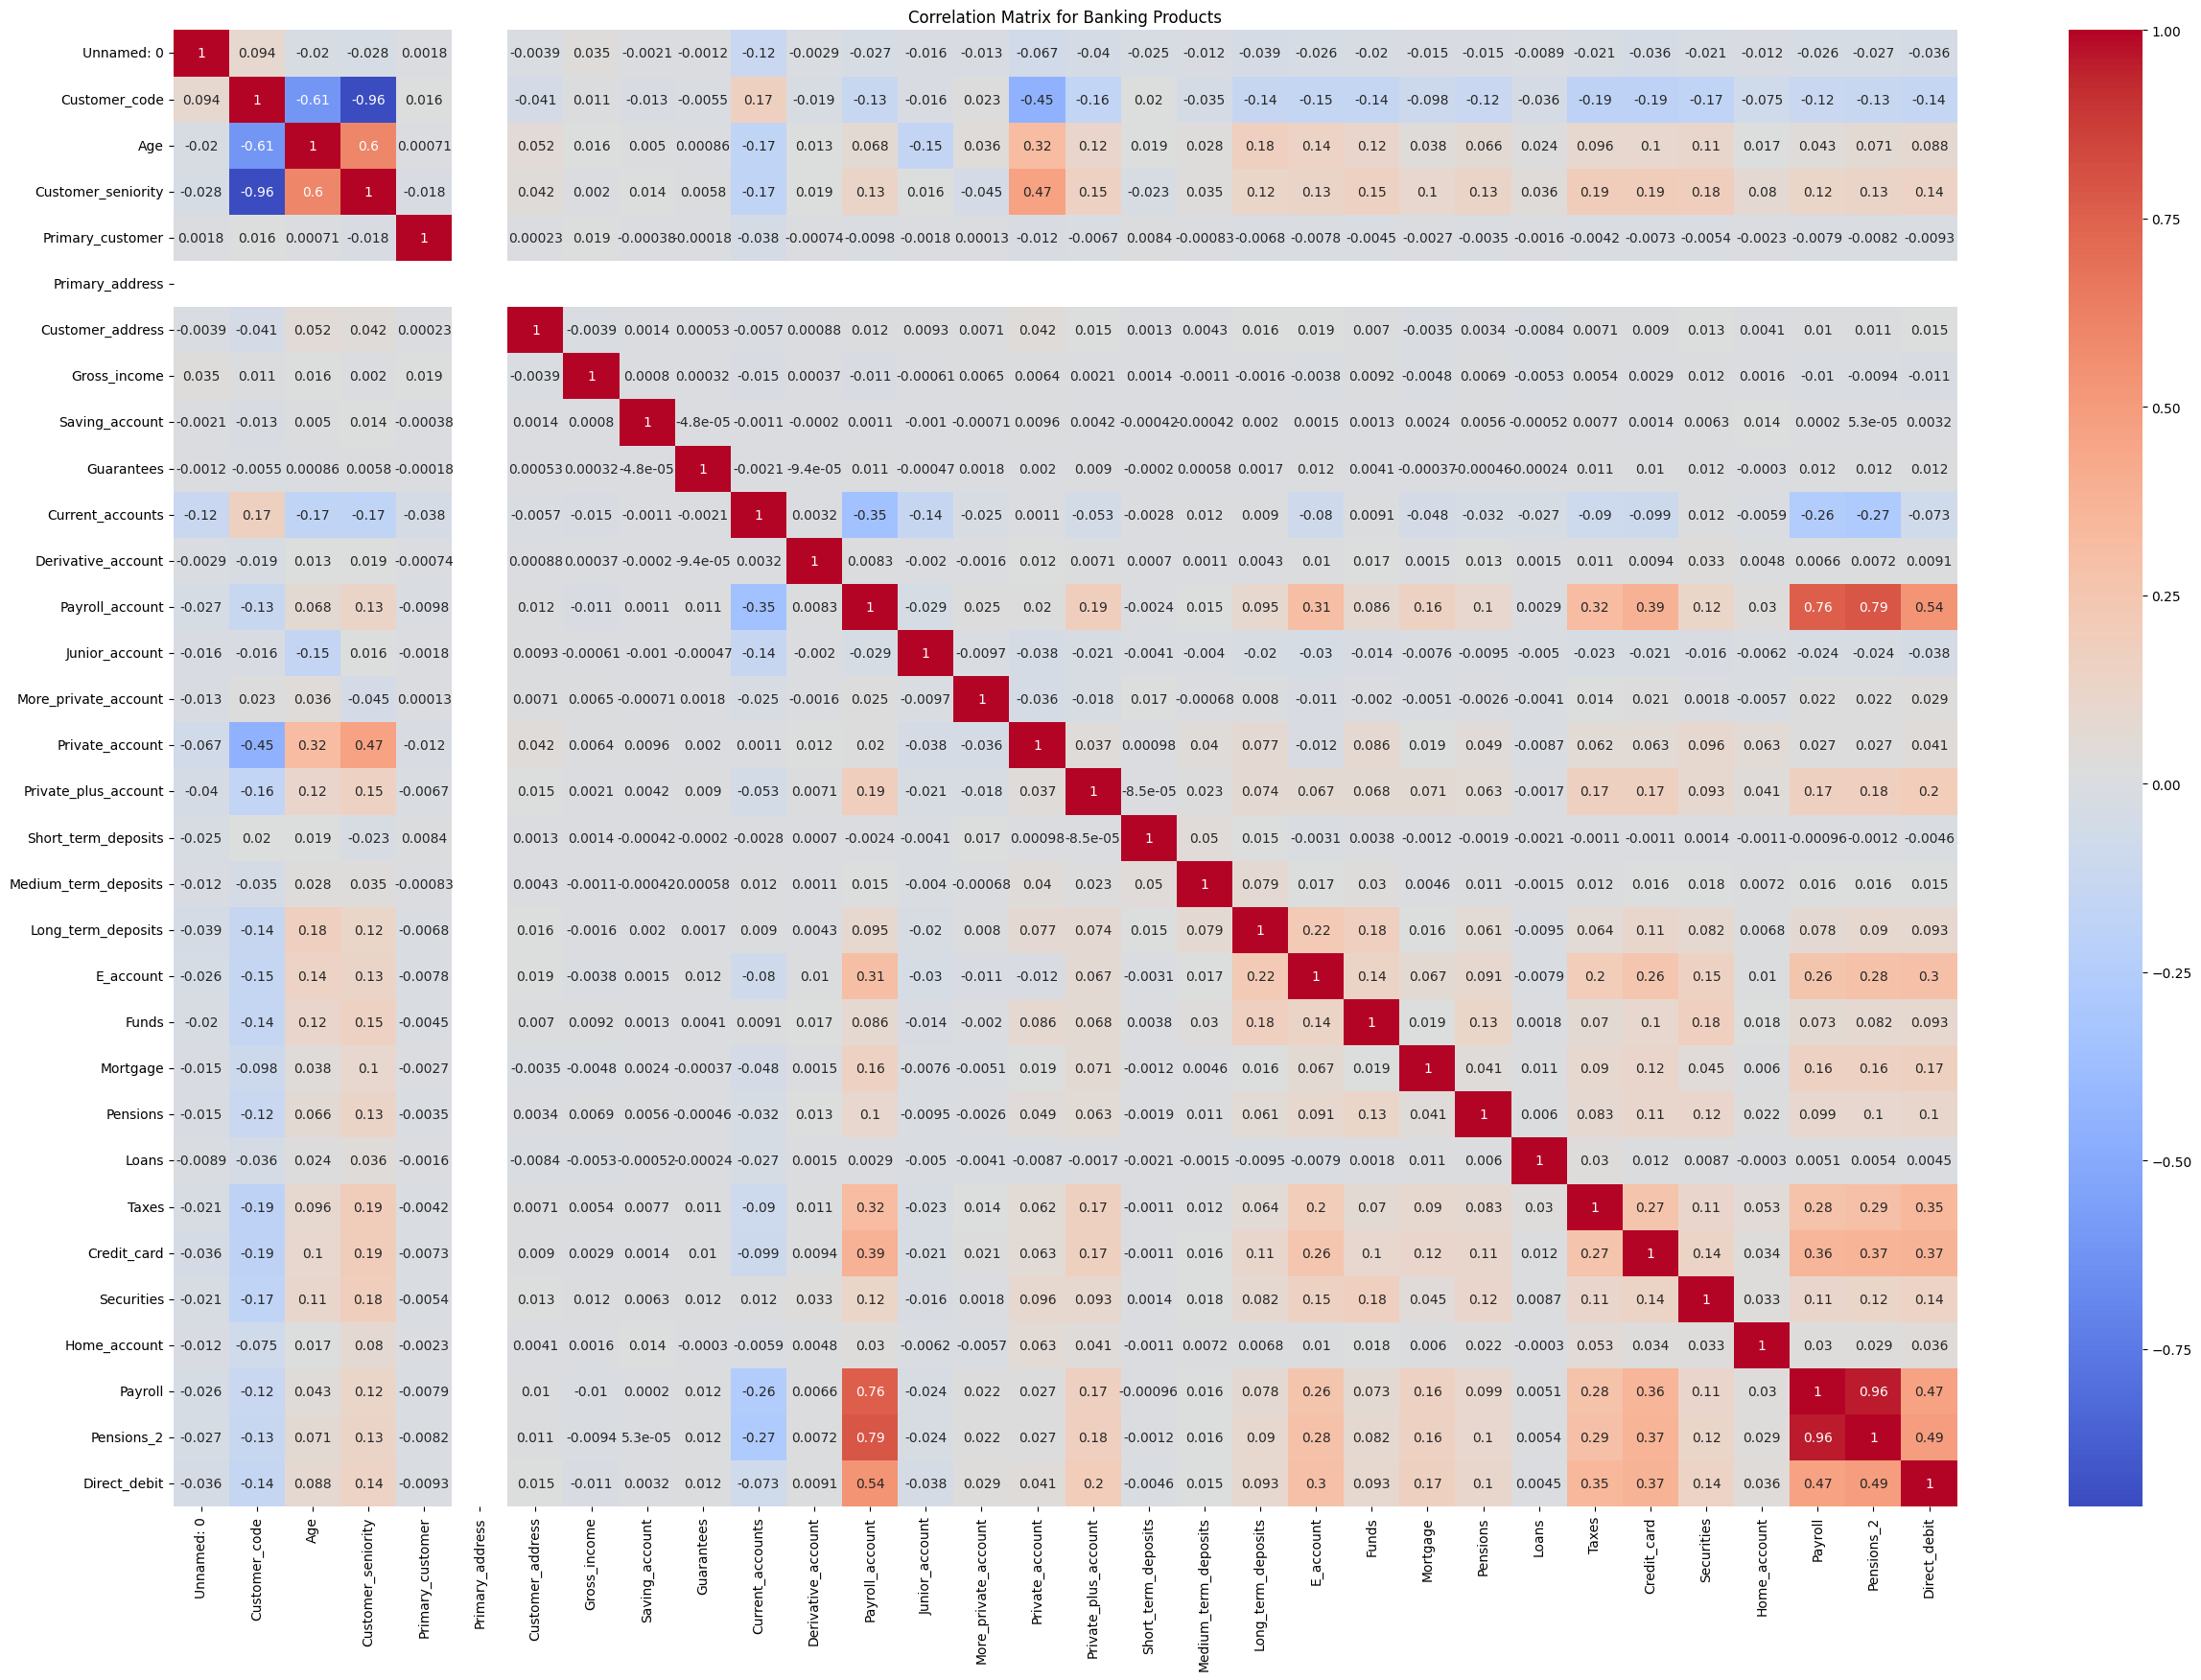

In [41]:
# plot the heatmap
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for Banking Products')
plt.show()

In [32]:
# Find the product pairs with high correlation
high_corr_pairs = []
for i, col_i in enumerate(numeric_cols):
    for j, col_j in enumerate(numeric_cols[i+1:], i+1):
        if abs(corr_matrix.loc[col_i, col_j]) > 0.5:
            high_corr_pairs.append((col_i, col_j, corr_matrix.loc[col_i, col_j]))


In [33]:
# Print the high correlation pairs
for pair in high_corr_pairs:
    print(pair)

('Customer_code', 'Age', -0.6091021638865297)
('Customer_code', 'Customer_seniority', -0.9598218462605131)
('Age', 'Customer_seniority', 0.598397105896344)
('Payroll_account', 'Payroll', 0.7583185466555223)
('Payroll_account', 'Pensions_2', 0.7904491940665836)
('Payroll_account', 'Direct_debit', 0.5358739146202628)
('Payroll', 'Pensions_2', 0.957229951845345)


In [ ]:
# so Payroll account and Direct_debit are commonly purchased together

# Hypotheses: Are there any products that are commonly purchased alone?

In [35]:
# Find the product pairs with lowest correlation
low_corr_pairs = []
for i, col_i in enumerate(numeric_cols):
    for j, col_j in enumerate(numeric_cols[i+1:], i+1):
        if abs(corr_matrix.loc[col_i, col_j]) < 0.1:
            low_corr_pairs.append((col_i, col_j, corr_matrix.loc[col_i, col_j]))

In [38]:
# Find the products that have the lowest average correlation with all other products
product_corrs = {product: np.mean([abs(corr_matrix.loc[product, other_product]) for other_product in numeric_cols if other_product != product]) for product in numeric_cols}
products_alone = [product for product, corr in sorted(product_corrs.items(), key=lambda x: x[1])[:10]]
print("Products commonly purchased alone:")
print(products_alone)

Products commonly purchased alone:
['Unnamed: 0', 'Customer_code', 'Age', 'Customer_seniority', 'Primary_customer', 'Primary_address', 'Customer_address', 'Gross_income', 'Saving_account', 'Guarantees']


In [ ]:
# so saving account in commonly purchased alone

Product popularity trends over time for  'Saving_account', 'Current_accounts', 'Derivative_account', 'Payroll_account', 'Junior_account'

In [9]:
# Define the products to plot
products = ['Saving_account', 'Current_accounts', 'Derivative_account', 'Payroll_account', 'Junior_account']

In [13]:
# Compute the number of purchases of each product by year
df['Date'] = pd.to_datetime(df['Date'])
purchases = df.groupby([df.Date.dt.year])[products].sum()

In [15]:
# Compute the purchase rate (number of purchases divided by the number of customers) of each product by year
purchase_rate = purchases.div(df.groupby([df.Date.dt.year])['Customer_code'].nunique(), axis=0)

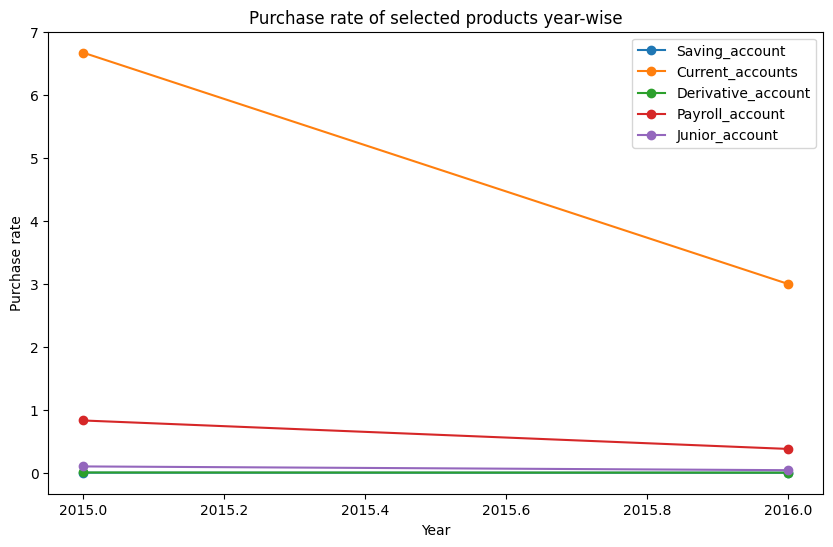

In [16]:
# Plot the purchase rate of each product
purchase_rate.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Purchase rate of selected products year-wise')
plt.xlabel('Year')
plt.ylabel('Purchase rate')
plt.legend(products)
plt.show()

Product popularity trends over time for 'More_private_account', 'Private_account', 'Private_plus_account', 'Short_term_deposits', 'Medium_term_deposits'

In [17]:
# Define the products to plot
products1 = ['More_private_account', 'Private_account', 'Private_plus_account', 'Short_term_deposits', 'Medium_term_deposits']

In [20]:
# Compute the number of purchases of each product by year
df['Date'] = pd.to_datetime(df['Date'])
purchases1 = df.groupby([df.Date.dt.year])[products1].sum()

In [21]:
# Compute the purchase rate (number of purchases divided by the number of customers) of each product by year
purchase_rate = purchases1.div(df.groupby([df.Date.dt.year])['Customer_code'].nunique(), axis=0)

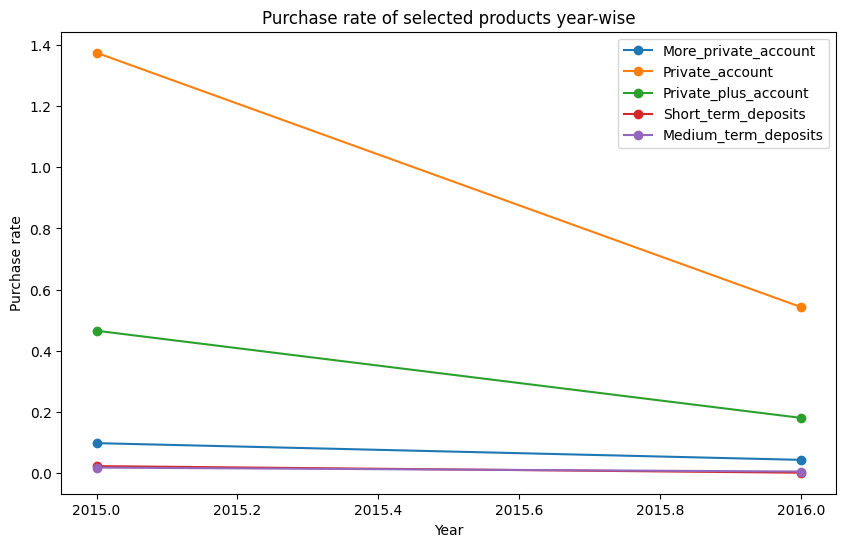

In [22]:
# Plot the purchase rate of each product
purchase_rate.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Purchase rate of selected products year-wise')
plt.xlabel('Year')
plt.ylabel('Purchase rate')
plt.legend(products1)
plt.show()

Product popularity trends over time for 'Long_term_deposits', 'E_Account' ,'Loans' , 'Credit_card', 'Securities', 'Home_account', 'Direct_debit'

In [23]:
products2 = ['Long_term_deposits','E_account' ,'Loans' ,'Credit_card','Securities','Home_account','Direct_debit']

In [24]:
# Compute the number of purchases of each product by year
df['Date'] = pd.to_datetime(df['Date'])
purchases2 = df.groupby([df.Date.dt.year])[products2].sum()

In [25]:
# Compute the purchase rate (number of purchases divided by the number of customers) of each product by year
purchase_rate = purchases2.div(df.groupby([df.Date.dt.year])['Customer_code'].nunique(), axis=0)

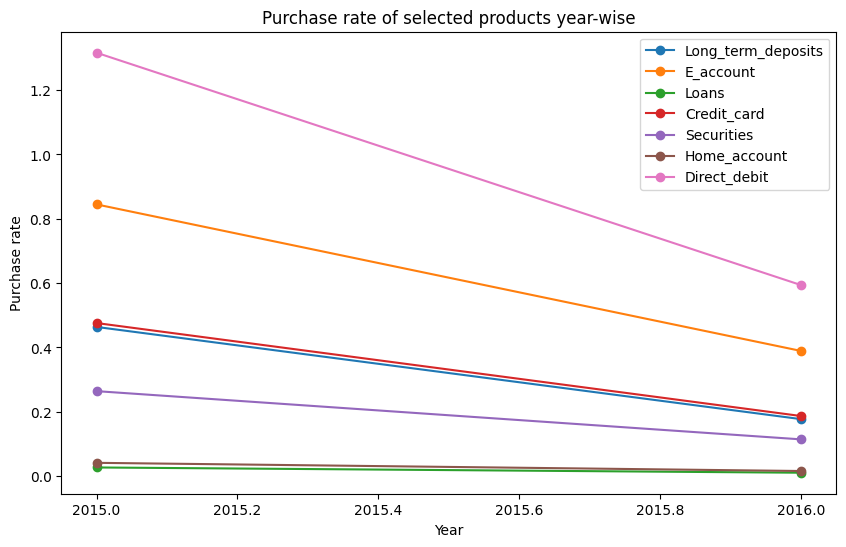

In [26]:
# Plot the purchase rate of each product
purchase_rate.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Purchase rate of selected products year-wise')
plt.xlabel('Year')
plt.ylabel('Purchase rate')
plt.legend(products2)
plt.show()

In [29]:
products3 = ['Guarantees','Funds','Mortgage','Pensions_2','Taxes','Pensions']

In [30]:
# Compute the number of purchases of each product by year
df['Date'] = pd.to_datetime(df['Date'])
purchases3 = df.groupby([df.Date.dt.year])[products3].sum()

In [31]:
# Compute the purchase rate (number of purchases divided by the number of customers) of each product by year
purchase_rate = purchases3.div(df.groupby([df.Date.dt.year])['Customer_code'].nunique(), axis=0)

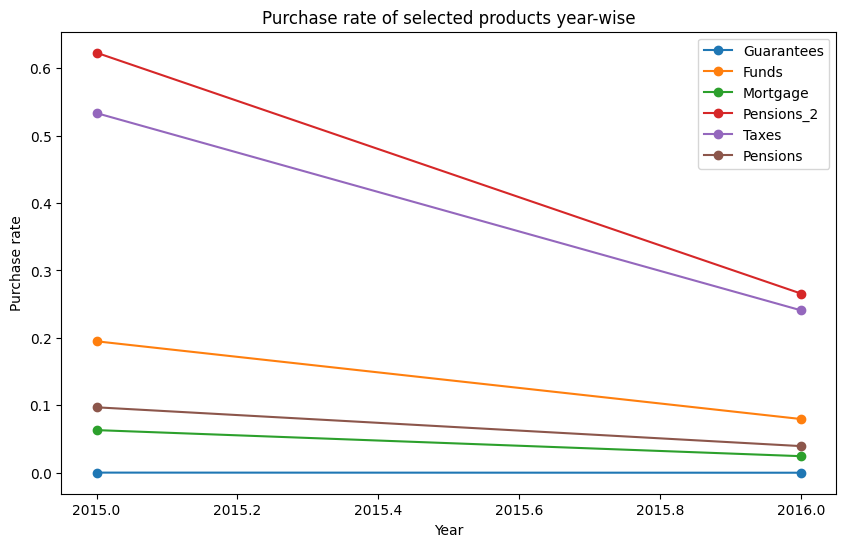

In [32]:
# Plot the purchase rate of each product
purchase_rate.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Purchase rate of selected products year-wise')
plt.xlabel('Year')
plt.ylabel('Purchase rate')
plt.legend(products3)
plt.show()

 test for dependency between Gross_income and product purchase

In [43]:
# create a contingency table of Gross_income and product purchase
income_purchase_ct = pd.crosstab(df['Gross_income'] > 80000, df[['Current_accounts', 'Derivative_account', 'Payroll_account', 'Junior_account']].sum(axis=1))

In [44]:
# perform chi-square test of independence
from scipy.stats import chi2_contingency

In [45]:
chi2, pval, dof, exp = chi2_contingency(income_purchase_ct)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")

Chi-square statistic: 17276.54697317662
P-value: 0.0


In [33]:
# create a contingency table of Gross_income and product purchase
income_purchase_ct1 = pd.crosstab(df['Gross_income'] > 80000, df[[ 'More_private_account', 'Private_account', 'Private_plus_account', 'Short_term_deposits', 'Medium_term_deposits', 'Long_term_deposits']].sum(axis=1))

In [34]:
chi2, pval, dof, exp = chi2_contingency(income_purchase_ct1)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")

Chi-square statistic: 100128.51608180723
P-value: 0.0


In [37]:
# create a contingency table of Gross_income and product purchase
income_purchase_ct2 = pd.crosstab(df['Gross_income'] > 80000, df[[ 'E_account', 'Loans', 'Credit_card', 'Direct_debit']].sum(axis=1))

In [38]:
chi2, pval, dof, exp = chi2_contingency(income_purchase_ct2)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")

Chi-square statistic: 29666.093720108183
P-value: 0.0


Finding the most popular products

In [11]:
selected_cols = ['Saving_account', 'Guarantees', 'Current_accounts', 'Derivative_account', 
                 'Payroll_account', 'Junior_account', 'More_private_account', 'Private_account', 
                 'Private_plus_account', 'Short_term_deposits', 'Medium_term_deposits', 
                 'Long_term_deposits', 'E_account', 'Funds', 'Mortgage', 'Pensions', 'Loans', 
                 'Taxes', 'Credit_card', 'Securities', 'Home_account', 'Payroll', 'Pensions_2', 
                 'Direct_debit']
                 
total_counts = df.loc[:, selected_cols].sum()

In [12]:
top_4 = total_counts.sort_values(ascending=False)[:4]

# Hypotheses 03 : younger customers may be more likely to purchase products like savings accounts, payroll accounts, Derivative account and current accounts

In [13]:
# Print the four most popular products
print("The four most popular products are:", top_4)

The four most popular products are: Current_accounts    8811803.0
Private_account     1744424.0
Direct_debit        1739181.0
E_account           1123704.0
dtype: float64


In [14]:
#Create age groups based on the Age column
age_bins = [0, 20, 40, 60, df['Age'].max()]
age_labels = ['0-20', '21-40', '41-60', '>60']
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [15]:
# Get the total purchases of each product by age group
top4_products = ['Saving_account', 'Current_accounts', 'Derivative_account', 'Payroll_account']
purchases_by_age = df.groupby('Age_group')[top4_products].sum()

In [16]:
# Print the results
print(purchases_by_age)

           Saving_account  Current_accounts  Derivative_account  \
Age_group                                                         
0-20                    0            282004                   2   
21-40                  44           4980616                 744   
41-60                1259           2596242                3503   
>60                    93            952941                1104   

           Payroll_account  
Age_group                   
0-20                  3772  
21-40               412888  
41-60               585444  
>60                  99114  


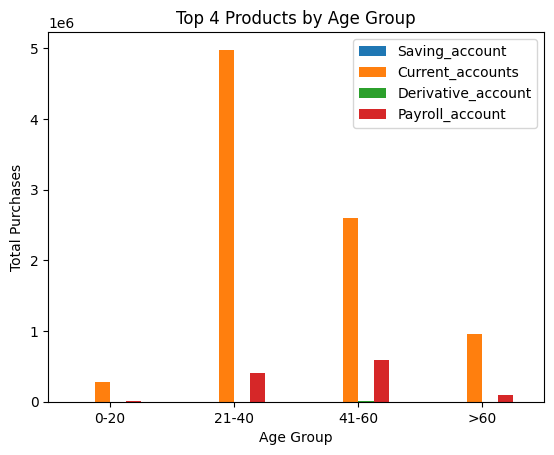

In [19]:
# Plot the purchases by age group
purchases_by_age.plot.bar(rot=0)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Purchases')
plt.title('Top 4 Products by Age Group')

# Show the plot
plt.show()

In [33]:
# youger peoples have more puchase interests in Current_account and Payroll_accounts

# Hypotheses 04: older customers may be more interested in pension and mortgage products 

In [21]:
# Get the total purchases of Pensions and Mortgage products by age group
two_products = ['Pensions', 'Mortgage']
purchases_by_age = df.groupby('Age_group')[two_products].sum()

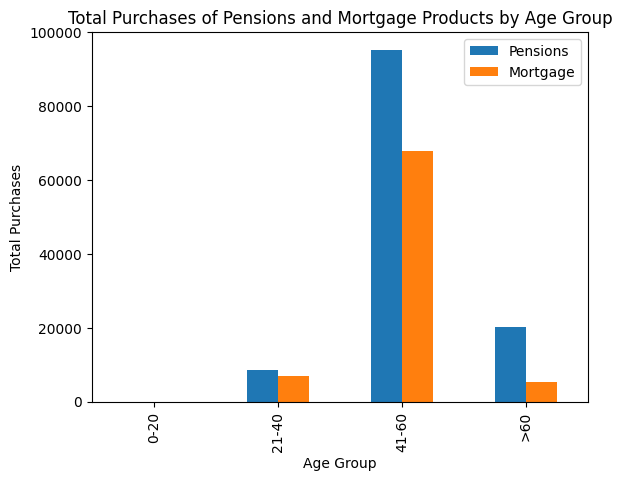

In [22]:
# Create a bar chart
purchases_by_age.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Total Purchases of Pensions and Mortgage Products by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchases')

# Show the chart
plt.show()

bank has less amount of age >60 peoples so when its comes to age older peoples buying more Pensions and Mortages compare to Younger group

# Recommendations based on Analyses

1.<div style="color:blue">Since Payroll Account and Direct Debit are commonly purchased together, it would be beneficial for the bank to create bundle offers for these two products.</div>

2.<div style="color:green">Saving Account is commonly purchased alone, which could indicate that customers are not aware of the benefits of bundling their products. The bank should consider creating awareness campaigns to promote the benefits of bundling.</div>

3.<div style="color:purple">As there has been a decline in the purchase of several products year on year, the bank should review and analyze the causes of the decline. This will enable them to identify the issues and take corrective actions</div>

4.<div style="color:red">The four most popular products are Current Accounts, Private Account, Direct Debit, and E-Account. The bank should focus on improving these products further and continue to promote them to attract more customers.</div>

5.<div style="color:aqua">The data suggests that older age customers are buying more Pensions and Mortgage products than younger age customers. The bank should consider promoting these products more to the older age group, while also introducing more age-specific products</div>

6.<div style="color:orange">Younger age customers are buying more Current Accounts and Payroll Accounts than older age customers. The bank could create more personalized products to attract more younger age customers. These products should cater to their needs and offer additional benefits to meet their specific requirements.</div>